In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('../data/data_phdosado.csv', index_col=1)
df = df.drop(columns=['ID'])
list(df.columns)

['Real_RD_PV_pHDosado',
 'Real_RD_MV_ValvulaCalpHDosado',
 'Real_RD_PV_VazaoDosado',
 'Real_RD_ST_LimpezaPHmetro',
 'Real_RD_PV_BaumeCal',
 'Real_RD_PV_PressaoLinhaCal',
 'Real_RD_MV_ValvulaCalpHDosado-2',
 'Real_RD_MV_PressaoLinhaCal',
 'Real_RD_PV_NivelTqCal',
 'Real_RD_PV_NivelTqDosado']

In [9]:
df.head()

,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_BaumeCal,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_ValvulaCalpHDosado-2,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado
timezone,,,,,,,,,,
2024-07-13 14:28:22,7.1260,37.128124,899.625,0.0,20.454374,0.798437,37.128124,74.546875,98.31250,73.84375
2024-07-13 14:28:25,7.1225,37.178123,899.625,0.0,20.454374,0.798437,37.178123,74.578125,98.34375,73.87500
2024-07-13 14:28:28,7.1225,37.187500,899.625,0.0,20.454374,0.796875,37.187500,74.559375,98.40625,73.87500
2024-07-13 14:28:31,7.1260,37.331249,899.625,0.0,20.454374,0.798437,37.331249,74.596875,98.50000,73.84375
2024-07-13 14:28:34,7.1225,37.218750,900.375,0.0,20.454374,0.798437,37.218750,74.562500,98.25000,73.87500


In [5]:
from matplotlib import pyplot as plt

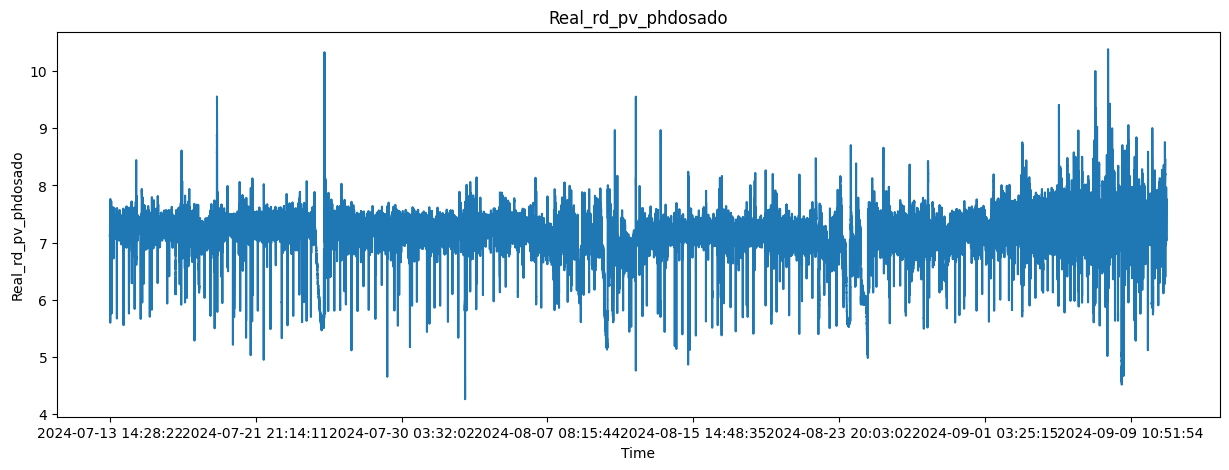

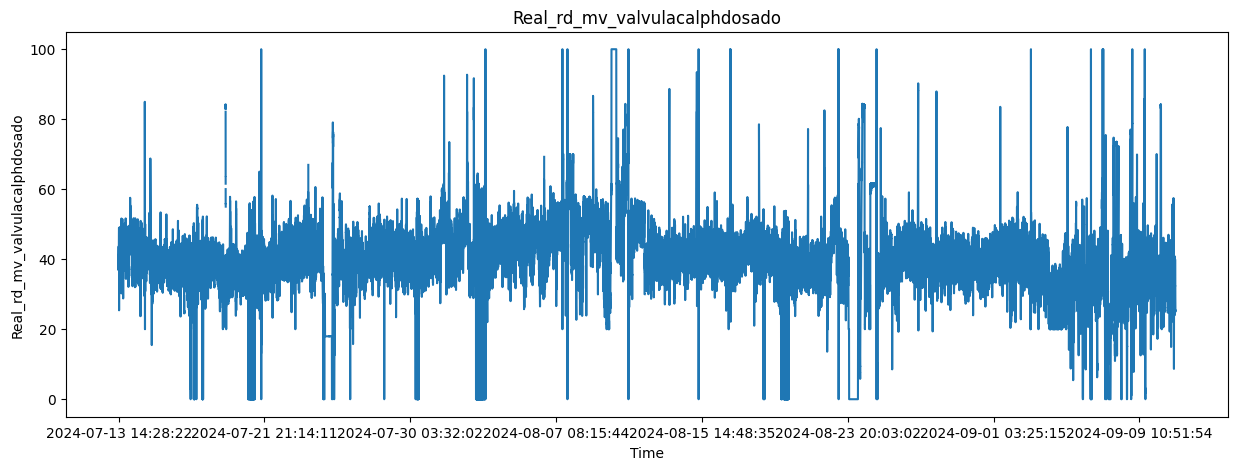

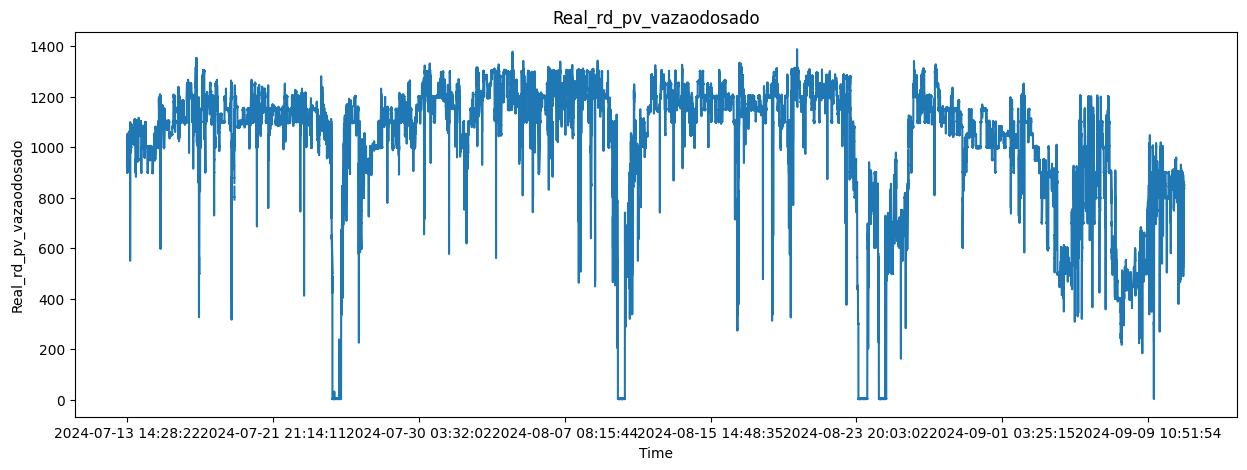

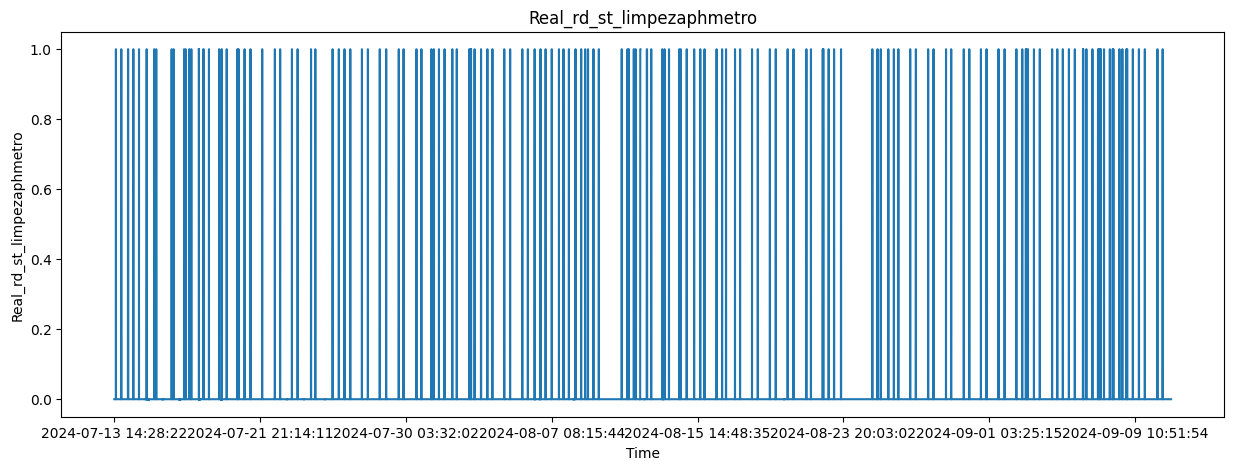

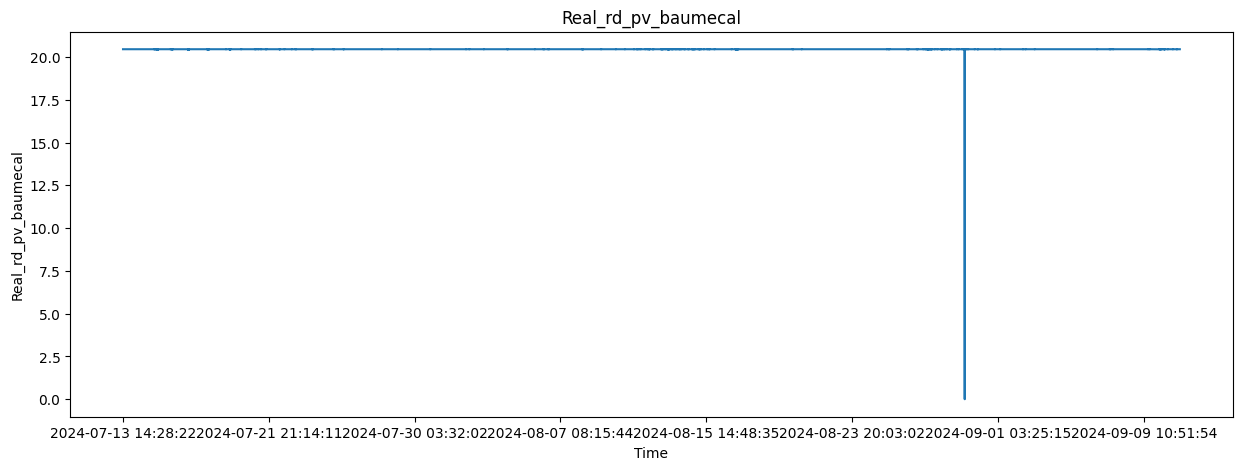

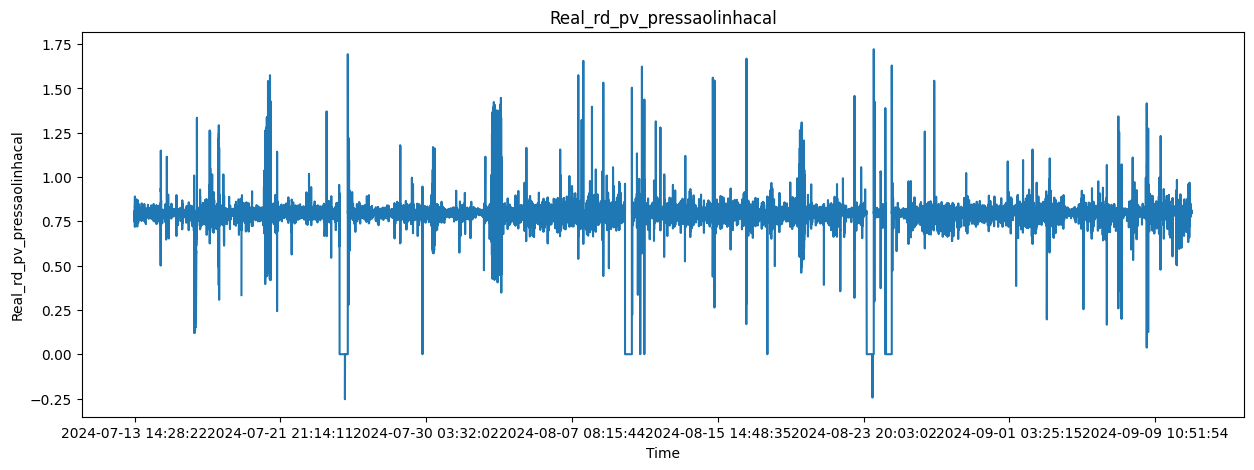

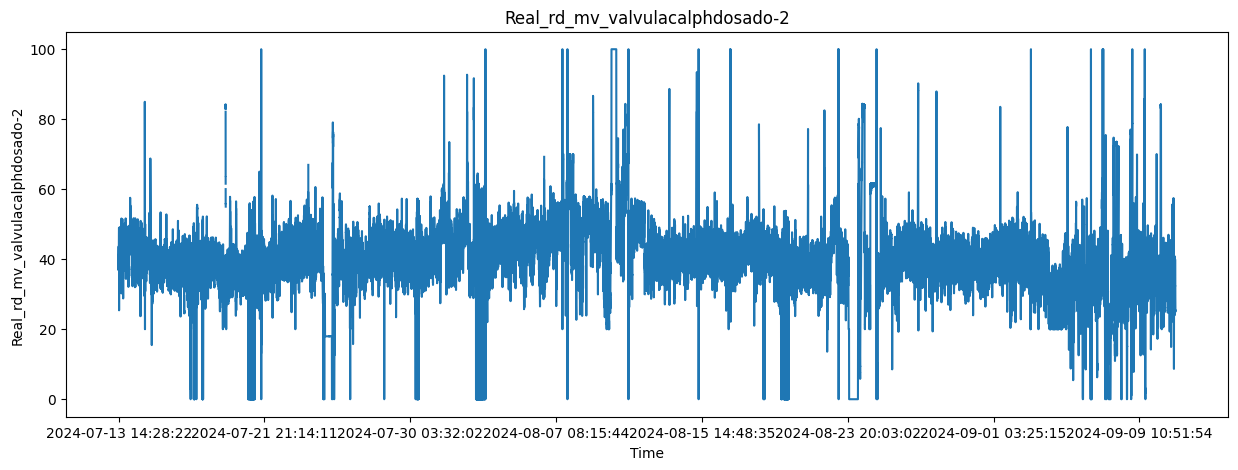

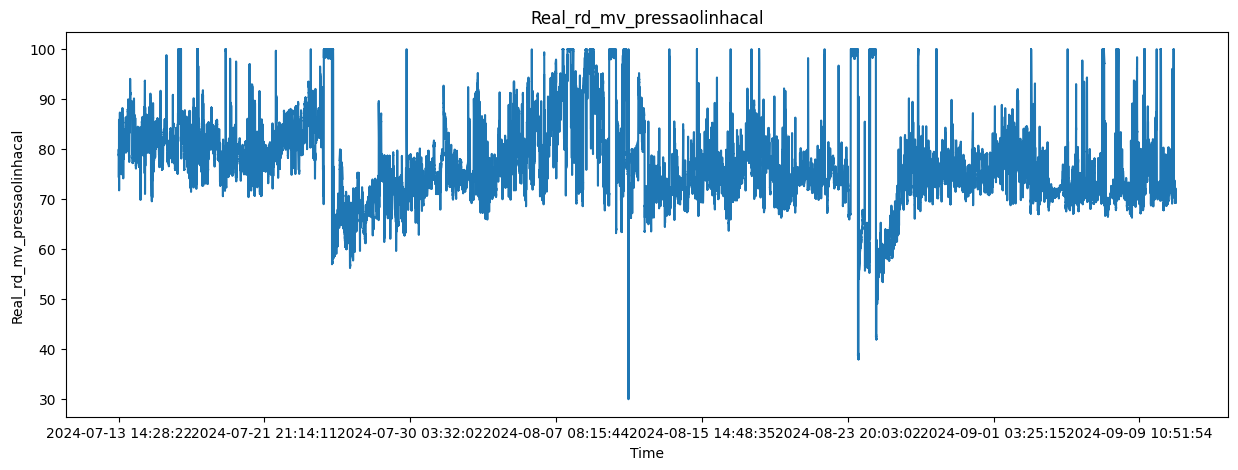

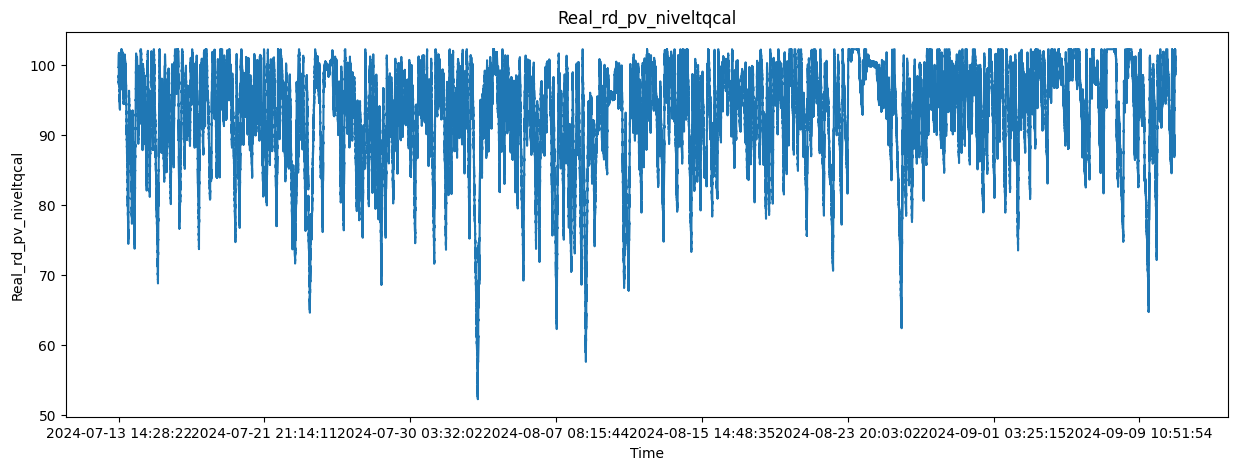

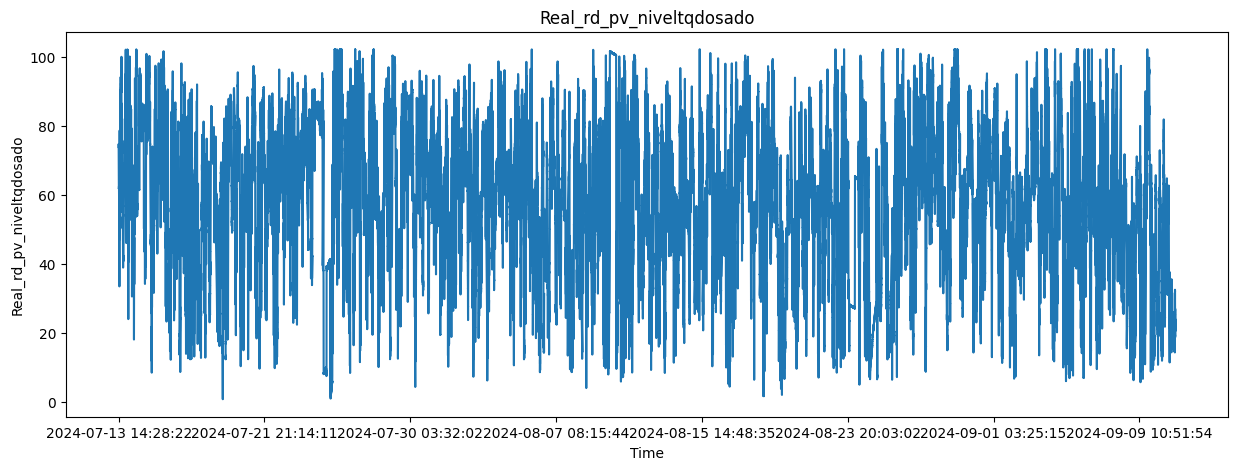

In [ ]:
for column in df.columns:
    ax = df[column].plot(title=f'{column.capitalize()}', ylabel=column.capitalize(), xlabel='Time', figsize=(15, 5))
    plt.show()